# Example: Regression with `Adam`

In this notebook we demonstrate how to use the `Adam` optimizer to train an instance of the `QNNRegressor` to fit a logarithm.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.feature_map import ChebPQC
from squlearn.expectation_operator import SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss, VarianceLoss, get_variance_fac
from squlearn.optimizers import Adam

In [2]:
executor = Executor("statevector_simulator")

## `QNNRegressor` Setup

We start by defining a parameterized quantum circuit (PQC)

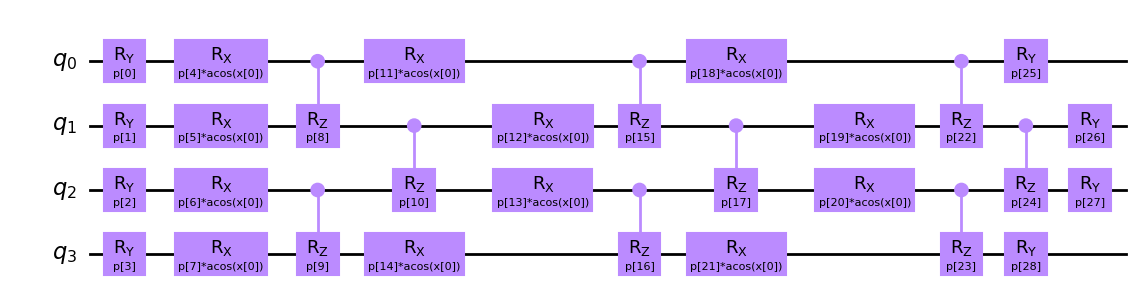

In [3]:
nqubits = 4
number_of_layers = 3

pqc = ChebPQC(nqubits, 1, num_layers=number_of_layers, closed=False)
pqc.draw("mpl")

We also need a cost operator

In [4]:
cost_op = SummedPaulis(nqubits)
print(cost_op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4])])


Now we can create the `QNNRegressor` with the PQC and cost operator. We also specify `SquaredLoss` and `Adam` as the loss function and optimizer respectively. Finally we specify random initial parameters for both, the PQC and cost operator. For the `Adam` optimizer, we specify a maximum number of allowed iterations and a learning rate.

In [5]:
np.random.seed(13)
param_ini = np.random.rand(pqc.num_parameters) * 4
param_op_ini = np.ones(cost_op.num_parameters)

ADAM = Adam({"maxiter": 50, "lr": 0.1})

reg = QNNRegressor(
    pqc,
    cost_op,
    executor,
    SquaredLoss(),
    ADAM,
    param_ini,
    param_op_ini,
    variance=get_variance_fac(0.005, 0.5, 5),
)

## Training

Now we are ready to train the model to fit the logarithm funciton

In [6]:
X = np.arange(0.1, 0.9, 0.1)
y = np.log(X)

reg.fit(X, y)

theta [3.11080964 0.95016488 3.29711413 3.86299679 3.89040446 1.81379699
 2.43616985 3.10210606 2.56645338 2.88807292 0.1401461  1.19379788
 0.23404997 3.42824377 1.49141611 2.71939181 1.0251198  1.39032486
 0.03765108 1.43333513 3.79637673 0.87159604 1.27756547 3.67108954
 0.12761467 0.26033815 2.519316   3.49525377 0.03486293 1.
 1.         1.         1.         1.        ]
Current value: 56.394715291045124
theta [3.11080964 0.95016488 3.29711413 3.86299679 3.89040446 1.81379699
 2.43616985 3.10210606 2.56645338 2.88807292 0.1401461  1.19379788
 0.23404997 3.42824377 1.49141611 2.71939181 1.0251198  1.39032486
 0.03765108 1.43333513 3.79637673 0.87159604 1.27756547 3.67108954
 0.12761467 0.26033815 2.519316   3.49525377 0.03486293 1.
 1.         1.         1.         1.        ]
Grad length: 63.9537044289369
grad [  0.52348418   2.60030605  -1.43284283  -1.59848242   6.05881838
   1.05112679 -13.48612921  12.00088504  12.7947583    1.11221222
  -2.73168141  -1.52007302  -5.76641424 -

## Evaluation

Let's check the trained parameters of the PQC and operator

In [7]:
print("Result PQC params:", reg._param)
print("Result operator params:", reg._param_op)

Result PQC params: [ 1.85864558  2.40076555  2.16467602  3.3546674   2.95340035 -0.25131017
  2.61520484  1.95462771  1.53564032  2.14224606  0.40873856  0.94635988
  0.28752893  3.06449968  0.79523728  2.01949843  1.23289095  2.32095989
 -1.02290872  1.87518783  2.36921484  1.1406508   0.48471792  2.61125097
  0.41732844  1.22931963  1.91220113  2.61020691 -0.13337391]
Result operator params: [-0.66023726  0.50587425  0.42831288 -0.29429597  0.7918703 ]


Also let's plot the predicted function vs. the actual logarithm function

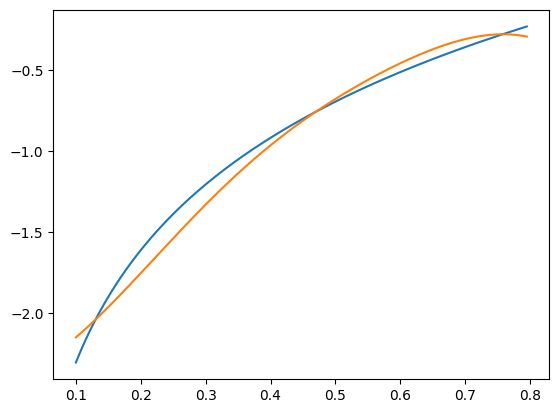

In [8]:
x = np.arange(np.min(X), np.max(X), 0.005)
y = reg.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)